In [60]:
import pandas as pd
from bs4  import BeautifulSoup
import numpy as np

# Restaurants

In [61]:
resto_soup = pd.read_csv('restaurant_soup').drop(columns='Unnamed: 0').squeeze()
resto_soup2 = pd.read_csv('restaurant_soup2.csv').drop(columns='Unnamed: 0').squeeze()

In [62]:
resto_soup2.index

Index(['Cerveseria Catalana', 'My Fucking Restaurant', 'Ciutat Comtal',
       'Tapeo', 'Arume', 'Taquerías Tamarindo', 'Vinitus', 'Somorrostro',
       'Cañete', 'Firebug',
       ...
       'Chez Cocó', 'Portolés', 'Bo de Gracia', 'Margherita', 'Bar Nolla',
       'Casa Dorita', 'Palmito Beach Bar', 'Takumi Sapporo Ramen Kitchen',
       'Bosque Palermo', 'Son Hao'],
      dtype='object', length=207)

In [63]:
resto_soup.index


Index(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110',
       '120', '130', '140', '150', '160', '170', '180', '190', '200', '210',
       '220', '230'],
      dtype='object')

In [64]:
# restaurant name
r_name = []
for row in resto_soup:  # row contain 10 restaurants
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('.css-1egxyvc .css-1m051bw')
    for tag in result:
        # print(tag.text)
        r_name.append(tag.text)

In [65]:
# It's like there are duplicates
pd.Series(r_name).value_counts()

La Paradeta                    5
Estimar                        2
Els Sortidors del Parlament    2
Eden                           2
Federal                        2
                              ..
Las Sorrentinas                1
Luigi                          1
Chen Ji                        1
El Quim de la Boqueria         1
Son Hao                        1
Length: 207, dtype: int64

In [66]:
price_range = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        price = header_text.select_one('.css-1s7bx9e')
        if price is not None:
            price_range.append(price.text)
        else:
            price_range.append(np.nan)

        # print(   pd.Series(header_text).str.extract(r'(€+)').squeeze()   )
        # print('-'*100)
    

In [67]:
# ratings = []
# for row in resto_soup:
#     soup = BeautifulSoup(row, 'html.parser')
#     result = soup.find_all(class_ = container_class)
#     for tag in result:
#         header_text = tag.div.div.div.nextSibling.div.div.div.nextSibling.div.div.div.span.div
#         rating = header_text.select('aria_label')
#         for r in rating:
#             print(r.find_next_sibling.text())
#         # if rating is not None:
#         #     ratings.append(rating)
#         # else:
#         #     rating.append(np.nan)

# rating

In [84]:
review_count = []

for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        reviews = header_text.select_one('.css-chan6m')
        if reviews is not None:
            review_count.append(reviews.text)
        else:
            review_count.append(np.nan)

review_count = [int(toint) for toint in review_count]


In [69]:
category_list = []

for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        category = header_text.select_one('.css-dd1rsv')
        if category is not None:
            category_list.append(category.text)
        else:
            category_list.append(np.nan)



In [70]:
neighbourhood_list = []
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        neighbourhood = header_text.select_one('.css-dzq7l1 .css-chan6m')
        if neighbourhood is not None:
            neighbourhood_list.append(neighbourhood.text)
        else:
            neighbourhood_list.append(np.nan)


In [80]:
rating = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rat = header_text.select_one('.overflow--hidden__09f24___ayzG')
        
        if rat is not None:
            rating.append(rat['aria-label'].split()[0])

            # print(rat['aria-label'])

        else:
            rating.append(np.nan)

rating = [float(toint) for toint in rating]



[4.5,
 4.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.0,
 4.5,
 4.5,
 5.0,
 4.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 5.0,
 4.5,
 4.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.0,
 4.5,
 4.5,
 5.0,
 4.5,
 4.0,
 4.5,
 4.5,
 4.5,
 5.0,
 4.5,
 4.5,
 4.0,
 5.0,
 4.0,
 4.5,
 4.5,
 4.5,
 5.0,
 4.5,
 4.5,
 5.0,
 4.5,
 4.0,
 4.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 5.0,
 4.0,
 4.5,
 4.0,
 4.5,
 5.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.0,
 4.5,
 4.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.5,
 5.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 5.0,
 4.5,
 4.0,
 5.0,
 4.5,
 4.5,
 4.5,
 4.0,
 5.0,
 4.5,
 5.0,
 4.5,
 4.0,
 4.5,
 4.0,
 5.0,
 4.5,
 5.0,
 5.0,
 4.5,
 5.0,
 5.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.0,
 4.5,
 5.0,
 4.5,
 5.0,
 4.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.0,
 5.0,
 4.0,
 4.0,
 4.0,
 4.0

In [72]:

location = [] 
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('address .raw__09f24__T4Ezm')
    adress_elements = []
    for tag in result:
        adress_elements.append(tag.text)
    location.append( '--'.join(adress_elements) )


In [73]:
# .css-na3oda+ .css-1p9ibgf .css-1um3nx
website = []
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select_one('.css-na3oda+ .css-1p9ibgf .css-1um3nx')
    # for tag in result:
    if result is not None:
        website.append( result.text ) 

    else:
        website.append(np.nan)


In [ ]:

nb_photos = []
photo_header_class = 'photo-header-content-container__09f24__jDLBB border-color--default__09f24__NPAKY'
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    photo_header = soup.find(class_ = photo_header_class)
    if photo_header is not None:

        nb_photos.append(  pd.Series(photo_header.text).str.extract(r'See (\d+) photos').squeeze()  )
        # print('-'*100)

    else:
        nb_photos.append(np.nan)
    

In [ ]:
opening_hours = {'name':list(), 'day':list(), 'opening':list(), 'closing':list()}
for row, name in zip(resto_soup2, resto_soup2.index):
    soup = BeautifulSoup(row, 'html.parser')
    days = []
    days_container = soup.select('.day-of-the-week__09f24__JJea_')
    time_container = soup.select('.no-wrap__09f24__c3plq.css-1p9ibgf')
    for day, time in zip(days_container, time_container):

        opening_hours['name'].append(name)
        opening_hours['day'].append(day.text)
        opening_hours['opening'].append(   pd.Series(time.text).str.extract(r'(\d+:\d+ \w+) - \d+:\d+ \w+').squeeze()   )
        opening_hours['closing'].append( pd.Series(time.text).str.extract(r'\d+:\d+ \w+ - (\d+:\d+ \w+)').squeeze() )

In [ ]:
# Some restaurants open twice a day...it was hard to get the second time
# Things to based analysis (numbers of openings hours day on average, do they open on the weekend.)
opening_hours_df = pd.DataFrame(opening_hours)

for i in range(len(opening_hours_df)):
    print( list(opening_hours_df.iloc[i, :]) ) 



In [85]:
df = pd.DataFrame(zip(r_name, rating, review_count, price_range, category_list, neighbourhood_list, location, website), columns=("Restaurant names", "Rating", "Review count", "Price range", "Category", "Neighbourhood", "Location", "Website"))
# df.to_csv("Restaurant full data.csv")
df.head(210)

,Restaurant names,Rating,Review count,Price range,Category,Neighbourhood,Location,Website
0,Cerveseria Catalana,4.5,1279,€€,Spanish,L'Eixample,"Carrer de Mallorca, 236--08008 Barcelona--Spain",http://cerveceriacatalana.food…
1,My Fucking Restaurant,4.5,89,€€€,Catalan,El Raval,"Carrer Nou de la Rambla, 35--08001 Barcelona--...",http://www.myfuckingrestaurant…
2,Ciutat Comtal,4.0,1120,€€,Tapas Bars,L'Eixample,"Rambla de Catalunya, 18--08007 Barcelona--Spain",NaN
3,Tapeo,4.5,451,€€,Tapas Bars,"Sant Pere, Santa Caterina i la Ribera-Born","Carrer de Montcada, 29--08003 Barcelona--Spain",http://www.tapeoborn.cat
4,Arume,4.5,633,€€,Mediterranean,El Raval,"Carrer d'En Botella, 11--08007 Barcelona--Spain",http://arumerestaurant.com/
...,...,...,...,...,...,...,...,...
202,Els Sortidors del Parlament,4.5,18,€€,Tapas Bars,L'Eixample,"Carrer de Tamarit, 142--08015 Barcelona--Spain",http://casadorita.com
203,Equilibrium Cafè,4.5,10,€,Coffee & Tea,L'Eixample,"Carrer de Ramon Trias Fargas, 2--08005 Barcelo...",http://www.encompaniadelobos.c…
204,Marina Bay,4.0,35,€€,Seafood,La Vila Olímpica,"Via Laietana, 32--08003 Barcelona--Spain",NaN
205,Norte,4.0,9,€,Spanish,L'Eixample,"Carrer de València, 163--08011 Barcelona--Spain",NaN


In [147]:
df_min_max_scaled = df.copy()

column = 'Review count'
column1 = 'Rating'

df_min_max_scaled[column, column1] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) / (df_min_max_scaled[column1] - df_min_max_scaled[column1].min()) / (df_min_max_scaled[column1].max() - df_min_max_scaled[column1].min())
df_max_scaled = df.copy()
df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()
# df_min_max_scaled.plot.scatter(x='Review count', y='Rating')
df_min_max_scaled.head(20)

,Restaurant names,Rating,Review count,Price range,Category,Neighbourhood,Location,Website,"(Review count, Rating)"
0,Cerveseria Catalana,4.5,1279,€€,Spanish,L'Eixample,"Carrer de Mallorca, 236--08008 Barcelona--Spain",http://cerveceriacatalana.food…,2.000000
1,My Fucking Restaurant,4.5,89,€€€,Catalan,El Raval,"Carrer Nou de la Rambla, 35--08001 Barcelona--...",http://www.myfuckingrestaurant…,0.137715
2,Ciutat Comtal,4.0,1120,€€,Tapas Bars,L'Eixample,"Rambla de Catalunya, 18--08007 Barcelona--Spain",NaN,inf
3,Tapeo,4.5,451,€€,Tapas Bars,"Sant Pere, Santa Caterina i la Ribera-Born","Carrer de Montcada, 29--08003 Barcelona--Spain",http://www.tapeoborn.cat,0.704225
4,Arume,4.5,633,€€,Mediterranean,El Raval,"Carrer d'En Botella, 11--08007 Barcelona--Spain",http://arumerestaurant.com/,0.989045
5,Taquerías Tamarindo,4.5,208,€,Mexican,L'Eixample,"Carrer de Aragón, 236--08007 Barcelona--Spain",NaN,0.323944
6,Vinitus,4.5,304,€€,Tapas Bars,L'Eixample,"Carrer Del Consell de Cent, 333--08007 Barcelo...",NaN,0.474178
7,Somorrostro,4.5,368,€€,Catalan,Barceloneta,"Carrer de Sant Carles, 11--08003 Barcelona--Spain",http://www.restaurantesomorros…,0.574335
8,Cañete,4.5,392,€€€,Tapas/Small Plates,El Raval,"Carrer de la Unió, 17--08001 Barcelona--Spain",http://www.barcanete.com,0.611894
9,Firebug,4.5,125,€€,Tapas Bars,L'Eixample,"Passeig de Sant Joan, 23--08010 Barcelona--Spain",http://www.firebugbarcelona.co…,0.194053


<AxesSubplot:>

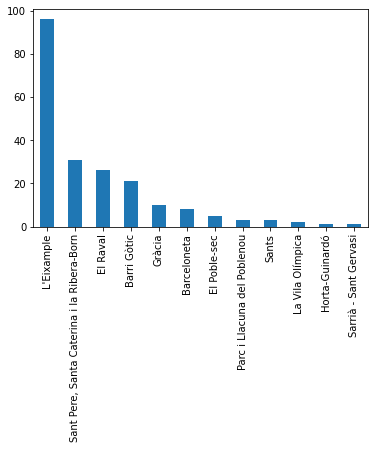

In [122]:
df['Neighbourhood'].value_counts().plot(kind='bar')

<AxesSubplot:>

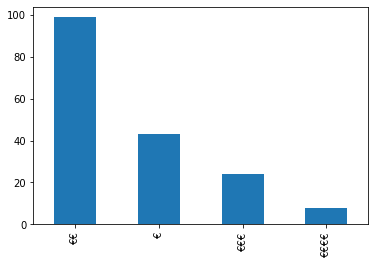

In [124]:
df['Price range'].value_counts().plot(kind='bar')

<AxesSubplot:>

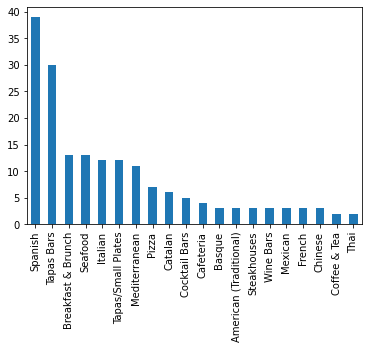

In [138]:
df['Category'].value_counts().nlargest(20).plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

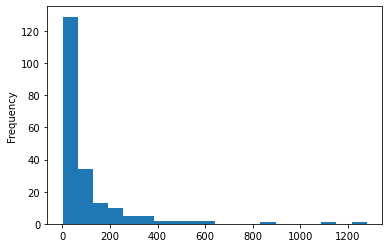

In [152]:
df['Review count'].plot(kind='hist', bins=20)
